In [1]:
# Testeamos que esta usando la GPU
import tensorflow as tf
gpu_available = tf.config.list_physical_devices('GPU')
print("GPU disponible:", len(gpu_available))
if not gpu_available:
    print("GPU no disponible. Se usará la CPU.")
else:
    print("GPU disponible. Se usará la GPU.")

GPU disponible: 1
GPU disponible. Se usará la GPU.


In [2]:
# Revisamos información de la GPU
!nvidia-smi

Fri Apr 12 18:27:32 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 552.12                 Driver Version: 552.12         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2060 ...  WDDM  |   00000000:0B:00.0  On |                  N/A |
|  0%   42C    P8             21W /  175W |    1417MiB /   8192MiB |     18%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
# Instalamos split-folders
%pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Importamos split-folders
import splitfolders

# Definimos ruta de entrada y salida
input_folder = "data/real_and_fake_face_detection/real_and_fake_face/"
output_folder = "data/dataset/"

# Dividimos el dataset (80% entrenamiento, 10% validación, 10% test)
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(0.8, 0.1, 0.1), group_prefix=None)

In [5]:
# Exploramos las carpetas
import os

for dir, dirname, files in os.walk(output_folder):
    print(f"Dir: {dir} | subdir: {dirname} | cantidad de imagenes: {len(files)}")

Dir: data/dataset/ | subdir: ['test', 'train', 'val'] | cantidad de imagenes: 0
Dir: data/dataset/test | subdir: ['training_fake', 'training_real'] | cantidad de imagenes: 0
Dir: data/dataset/test\training_fake | subdir: [] | cantidad de imagenes: 96
Dir: data/dataset/test\training_real | subdir: [] | cantidad de imagenes: 109
Dir: data/dataset/train | subdir: ['training_fake', 'training_real'] | cantidad de imagenes: 0
Dir: data/dataset/train\training_fake | subdir: [] | cantidad de imagenes: 768
Dir: data/dataset/train\training_real | subdir: [] | cantidad de imagenes: 864
Dir: data/dataset/val | subdir: ['training_fake', 'training_real'] | cantidad de imagenes: 0
Dir: data/dataset/val\training_fake | subdir: [] | cantidad de imagenes: 96
Dir: data/dataset/val\training_real | subdir: [] | cantidad de imagenes: 108


### Visualizamos algunos ejemplos del dataset

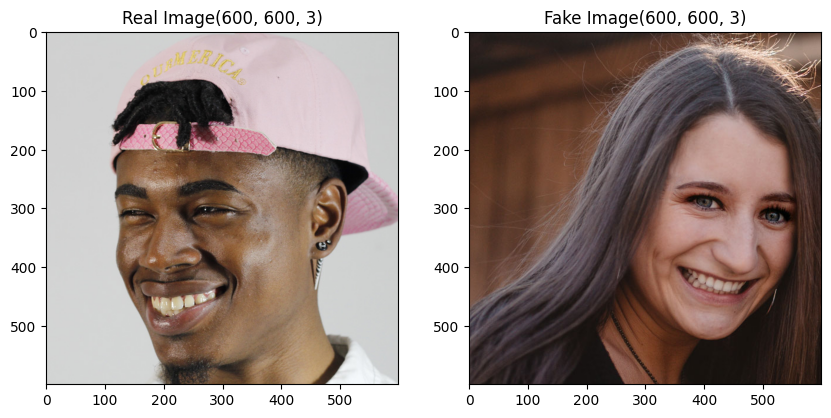

In [6]:
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(10, 10))
id_real = random.choice(range(0, 863))
id_fake = random.choice(range(0, 767))
plt.subplot(1, 2, 1)
img_name = [f for f in os.listdir(output_folder + "train/training_real")][id_real]
img = plt.imread(output_folder + "train/training_real/" + img_name)
plt.imshow(img)
plt.title("Real Image"+str(img.shape))
plt.subplot(1, 2, 2)
img_name = [f for f in os.listdir(output_folder + "train/training_fake")][id_fake]
img = plt.imread(output_folder + "train/training_fake/" + img_name)
plt.imshow(img)
plt.title("Fake Image"+str(img.shape));

In [7]:
# Exploramos las características de las imágenes
list_img_real = [f for f in os.listdir(output_folder + "train/training_real")]
list_img_fake = [f for f in os.listdir(output_folder + "train/training_fake")]
img_real_test = plt.imread(output_folder + "train/training_real/" + list_img_real[0])
print("Shape de la Imagen Real:", img_real_test.shape)
print("Dimensiones de la Imagen Real:", img_real_test.ndim)
print("Tipo de Datos de la Imagen Real:", img_real_test.dtype)
print("Valor Mínimo de Pixeles de la Imagen Real:", img_real_test.min())
print("Valor Máximo de Pixeles de la Imagen Real:", img_real_test.max())
img_fake_test = plt.imread(output_folder + "train/training_fake/" + list_img_fake[0])
print("Shape de la Imagen Fake:", img_fake_test.shape)
print("Dimensiones de la Imagen Fake:", img_fake_test.ndim)
print("Tipo de Datos de la Imagen Fake:", img_fake_test.dtype)
print("Valor Mínimo de Pixeles de la Imagen Fake:", img_fake_test.min())
print("Valor Máximo de Pixeles de la Imagen Fake:", img_fake_test.max())

Shape de la Imagen Real: (600, 600, 3)
Dimensiones de la Imagen Real: 3
Tipo de Datos de la Imagen Real: uint8
Valor Mínimo de Pixeles de la Imagen Real: 0
Valor Máximo de Pixeles de la Imagen Real: 255
Shape de la Imagen Fake: (600, 600, 3)
Dimensiones de la Imagen Fake: 3
Tipo de Datos de la Imagen Fake: uint8
Valor Mínimo de Pixeles de la Imagen Fake: 0
Valor Máximo de Pixeles de la Imagen Fake: 237


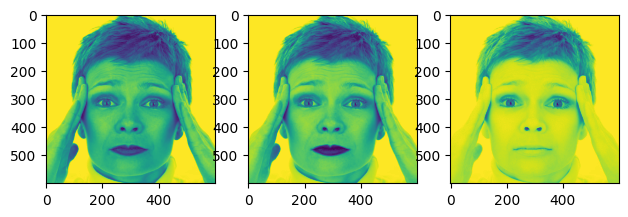

In [8]:
# Probamos con OpenCV una imagen real
import cv2
img_real_test = cv2.imread(output_folder + "train/training_real/" + list_img_real[0])
b, g, r = cv2.split(img_real_test)
plt.figure(figsize=(10, 10))
plt.subplot(1, 4, 1)
plt.imshow(b, cmap=None)
plt.subplot(1, 4, 2)
plt.imshow(g, cmap=None)
plt.subplot(1, 4, 3)
plt.imshow(r, cmap=None);

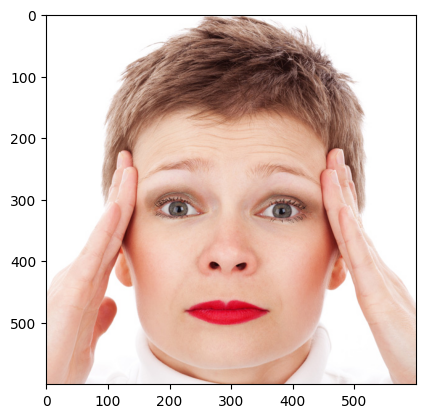

In [9]:
# Reconstruimos la imagen
img_real_rebuild = cv2.merge([r, g, b])
plt.imshow(img_real_rebuild);

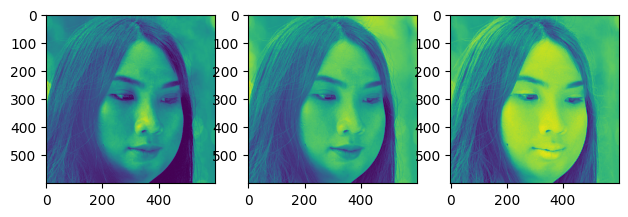

In [10]:
# Probamos con OpenCV una imagen fake
img_fake_test = cv2.imread(output_folder + "train/training_fake/" + list_img_fake[0])
b, g, r = cv2.split(img_fake_test)
plt.figure(figsize=(10, 10))
plt.subplot(1, 4, 1)
plt.imshow(b, cmap=None)
plt.subplot(1, 4, 2)
plt.imshow(g, cmap=None)
plt.subplot(1, 4, 3)
plt.imshow(r, cmap=None);

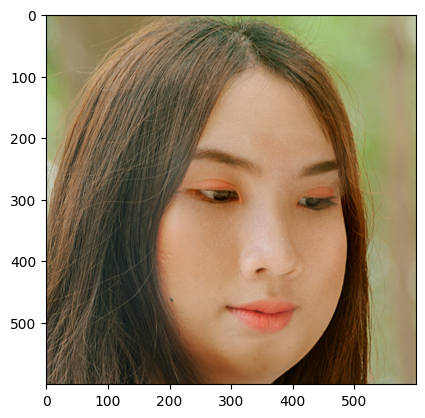

In [11]:
# Reconstruimos la imagen
img_fake_rebuild = cv2.merge([r, g, b])
plt.imshow(img_fake_rebuild);

### Creamos la arquitectura de una Red Neuronal Convolucional (CNN)
Esta arquitectura se utiliza para encontrar patrones en nuestras imagenes. Los pasos a seguir son:
* Cargamos las imagenes con Tensorflow
* Preprocesamos las imagenes para escalarlas
* Construimos la CNN para clasificación
* Compilamos la CNN
* Entrenamos la CNN con los datos de entrenamiento

In [12]:
# Primero instanciamos el generador de dataset
# Este lo que hace es permitirnos preprocesar las imagenes (rescalarlas y aplicarles tecnicas de data augmentation)
import tensorflow as tf
tf.random.set_seed(42) # usamos este seed para que cada vez que ejecutemos la celda nos repetira los mismos valores, se usa mucho cuando queremos replicar experimentos

train_dir = output_folder + "train"
valid_dir = output_folder + "val"
test_dir = output_folder + "test"

# Configuracion de aumento de datos y normalizacion
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                    rotation_range=40,
                                                                    width_shift_range=0.2,
                                                                    height_shift_range=0.2,
                                                                    shear_range=0.2,
                                                                    zoom_range=0.2,
                                                                    horizontal_flip=True,
                                                                    fill_mode='nearest')
valid_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                  horizontal_flip=True,
                                                                  vertical_flip=True)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                 horizontal_flip=True,
                                                                 vertical_flip=True)

# Generamos los datos de entrenamiento, validación y test
batch_size = 32
target_size = (224, 224)

train_batch = train_generator.flow_from_directory(directory=train_dir, target_size=target_size, batch_size=batch_size, class_mode='binary')
valid_batch = valid_generator.flow_from_directory(directory=valid_dir, target_size=target_size, batch_size=batch_size, class_mode='binary')
test_batch = test_generator.flow_from_directory(directory=test_dir, target_size=target_size, batch_size=batch_size, class_mode='binary')


Found 1632 images belonging to 2 classes.
Found 204 images belonging to 2 classes.
Found 205 images belonging to 2 classes.


In [13]:
# Analizamos las clases y etiquetas
print("Clases del Dataset:", train_batch.class_indices)
print("Etiquetas del Dataset:", train_batch.labels)

Clases del Dataset: {'training_fake': 0, 'training_real': 1}
Etiquetas del Dataset: [0 0 0 ... 1 1 1]


In [14]:
# Creamos el modelo de CNN utilizando la API funcional de Keras

# Definimos la entrada
input_layer = tf.keras.layers.Input(shape=(224, 224, 3))

# Definimos las capas convolucionales
conv1 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(input_layer)
maxpool1 = tf.keras.layers.MaxPool2D(2, 2)(conv1)
conv2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(maxpool1)
maxpool2 = tf.keras.layers.MaxPool2D(2, 2)(conv2)

# Capas completamente conectadas
flatten = tf.keras.layers.Flatten()(maxpool2)
dense1 = tf.keras.layers.Dense(128, activation='relu')(flatten)
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(dense1)

# Creamos el modelo
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0     

In [15]:
# Compilamos el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss=tf.keras.losses.BinaryCrossentropy(),
            metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [16]:
# Testeamos Pillow
from PIL import Image
print(Image.__file__)

f:\Anaconda\envs\deepcatcher_venv\lib\site-packages\PIL\Image.py


In [26]:
# Definimos path para checkpoints del modelo
checkpoint_path = "data/checkpoints/model"
# Entrenamos el modelo
model.fit(train_batch, 
          validation_data=valid_batch, 
          epochs=100, 
          callbacks=[tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_best_only=True)])

Epoch 1/100
51/51 [==============================] - ETA: 0s - loss: 0.6803 - accuracy: 0.5754 - precision: 0.5652 - recall: 0.8576

INFO:tensorflow:Assets written to: data/checkpoints\model\assets


INFO:tensorflow:Assets written to: data/checkpoints\model\assets


51/51 [==============================] - 23s 445ms/step - loss: 0.6803 - accuracy: 0.5754 - precision: 0.5652 - recall: 0.8576 - val_loss: 0.6896 - val_accuracy: 0.5490 - val_precision: 0.5506 - val_recall: 0.8056
Epoch 2/100
51/51 [==============================] - ETA: 0s - loss: 0.6809 - accuracy: 0.5711 - precision: 0.5680 - recall: 0.7928

INFO:tensorflow:Assets written to: data/checkpoints\model\assets


INFO:tensorflow:Assets written to: data/checkpoints\model\assets


51/51 [==============================] - 22s 430ms/step - loss: 0.6809 - accuracy: 0.5711 - precision: 0.5680 - recall: 0.7928 - val_loss: 0.6786 - val_accuracy: 0.5882 - val_precision: 0.5789 - val_recall: 0.8148
Epoch 3/100
51/51 [==============================] - 20s 393ms/step - loss: 0.6805 - accuracy: 0.5692 - precision: 0.5638 - recall: 0.8229 - val_loss: 0.6852 - val_accuracy: 0.5490 - val_precision: 0.5449 - val_recall: 0.8981
Epoch 4/100
51/51 [==============================] - 20s 398ms/step - loss: 0.6758 - accuracy: 0.5913 - precision: 0.5755 - recall: 0.8692 - val_loss: 0.6831 - val_accuracy: 0.5588 - val_precision: 0.5625 - val_recall: 0.7500
Epoch 5/100
51/51 [==============================] - 21s 403ms/step - loss: 0.6803 - accuracy: 0.5790 - precision: 0.5730 - recall: 0.8044 - val_loss: 0.6870 - val_accuracy: 0.5637 - val_precision: 0.5605 - val_recall: 0.8148
Epoch 6/100
51/51 [==============================] - 20s 398ms/step - loss: 0.6710 - accuracy: 0.5888 - prec

INFO:tensorflow:Assets written to: data/checkpoints\model\assets


INFO:tensorflow:Assets written to: data/checkpoints\model\assets


51/51 [==============================] - 22s 433ms/step - loss: 0.6711 - accuracy: 0.5882 - precision: 0.5779 - recall: 0.8241 - val_loss: 0.6782 - val_accuracy: 0.5539 - val_precision: 0.5541 - val_recall: 0.8056
Epoch 8/100
51/51 [==============================] - 21s 404ms/step - loss: 0.6753 - accuracy: 0.5950 - precision: 0.5821 - recall: 0.8333 - val_loss: 0.6884 - val_accuracy: 0.5833 - val_precision: 0.5827 - val_recall: 0.7500
Epoch 9/100
51/51 [==============================] - 21s 400ms/step - loss: 0.6704 - accuracy: 0.6036 - precision: 0.5914 - recall: 0.8125 - val_loss: 0.6848 - val_accuracy: 0.5686 - val_precision: 0.5667 - val_recall: 0.7870
Epoch 10/100
51/51 [==============================] - 20s 398ms/step - loss: 0.6708 - accuracy: 0.5882 - precision: 0.5791 - recall: 0.8137 - val_loss: 0.7037 - val_accuracy: 0.5539 - val_precision: 0.5691 - val_recall: 0.6481
Epoch 11/100
51/51 [==============================] - 20s 395ms/step - loss: 0.6681 - accuracy: 0.5852 - pr

INFO:tensorflow:Assets written to: data/checkpoints\model\assets


INFO:tensorflow:Assets written to: data/checkpoints\model\assets


51/51 [==============================] - 22s 432ms/step - loss: 0.6700 - accuracy: 0.5907 - precision: 0.5860 - recall: 0.7731 - val_loss: 0.6746 - val_accuracy: 0.5735 - val_precision: 0.5695 - val_recall: 0.7963
Epoch 16/100
51/51 [==============================] - 20s 390ms/step - loss: 0.6687 - accuracy: 0.6042 - precision: 0.5928 - recall: 0.8056 - val_loss: 0.7052 - val_accuracy: 0.5392 - val_precision: 0.5574 - val_recall: 0.6296
Epoch 17/100
51/51 [==============================] - 20s 393ms/step - loss: 0.6632 - accuracy: 0.6029 - precision: 0.5944 - recall: 0.7870 - val_loss: 0.7312 - val_accuracy: 0.5294 - val_precision: 0.5545 - val_recall: 0.5648
Epoch 18/100
51/51 [==============================] - 20s 395ms/step - loss: 0.6678 - accuracy: 0.6072 - precision: 0.5951 - recall: 0.8079 - val_loss: 0.6835 - val_accuracy: 0.5294 - val_precision: 0.5390 - val_recall: 0.7685
Epoch 19/100
51/51 [==============================] - 20s 395ms/step - loss: 0.6670 - accuracy: 0.6005 - 

INFO:tensorflow:Assets written to: data/checkpoints\model\assets


INFO:tensorflow:Assets written to: data/checkpoints\model\assets


51/51 [==============================] - 22s 429ms/step - loss: 0.6516 - accuracy: 0.6342 - precision: 0.6170 - recall: 0.8148 - val_loss: 0.6740 - val_accuracy: 0.6127 - val_precision: 0.6000 - val_recall: 0.8056
Epoch 31/100
51/51 [==============================] - ETA: 0s - loss: 0.6566 - accuracy: 0.6238 - precision: 0.6030 - recall: 0.8472

INFO:tensorflow:Assets written to: data/checkpoints\model\assets


INFO:tensorflow:Assets written to: data/checkpoints\model\assets


51/51 [==============================] - 22s 426ms/step - loss: 0.6566 - accuracy: 0.6238 - precision: 0.6030 - recall: 0.8472 - val_loss: 0.6704 - val_accuracy: 0.5882 - val_precision: 0.5800 - val_recall: 0.8056
Epoch 32/100
51/51 [==============================] - 20s 398ms/step - loss: 0.6526 - accuracy: 0.6275 - precision: 0.6070 - recall: 0.8403 - val_loss: 0.6894 - val_accuracy: 0.5539 - val_precision: 0.5739 - val_recall: 0.6111
Epoch 33/100
51/51 [==============================] - 20s 397ms/step - loss: 0.6452 - accuracy: 0.6146 - precision: 0.6043 - recall: 0.7882 - val_loss: 0.7214 - val_accuracy: 0.5882 - val_precision: 0.5968 - val_recall: 0.6852
Epoch 34/100
51/51 [==============================] - 21s 399ms/step - loss: 0.6572 - accuracy: 0.6183 - precision: 0.6015 - recall: 0.8264 - val_loss: 0.6914 - val_accuracy: 0.5931 - val_precision: 0.5912 - val_recall: 0.7500
Epoch 35/100
51/51 [==============================] - 20s 396ms/step - loss: 0.6581 - accuracy: 0.6189 - 

INFO:tensorflow:Assets written to: data/checkpoints\model\assets


INFO:tensorflow:Assets written to: data/checkpoints\model\assets


51/51 [==============================] - 22s 434ms/step - loss: 0.6546 - accuracy: 0.6158 - precision: 0.5985 - recall: 0.8333 - val_loss: 0.6511 - val_accuracy: 0.6225 - val_precision: 0.6084 - val_recall: 0.8056
Epoch 40/100
51/51 [==============================] - 20s 401ms/step - loss: 0.6507 - accuracy: 0.6293 - precision: 0.6098 - recall: 0.8322 - val_loss: 0.6713 - val_accuracy: 0.5980 - val_precision: 0.5855 - val_recall: 0.8241
Epoch 41/100
51/51 [==============================] - 21s 408ms/step - loss: 0.6507 - accuracy: 0.6317 - precision: 0.6108 - recall: 0.8391 - val_loss: 0.6825 - val_accuracy: 0.6176 - val_precision: 0.6014 - val_recall: 0.8241
Epoch 42/100
51/51 [==============================] - 21s 399ms/step - loss: 0.6549 - accuracy: 0.6195 - precision: 0.6031 - recall: 0.8229 - val_loss: 0.6803 - val_accuracy: 0.5882 - val_precision: 0.5750 - val_recall: 0.8519
Epoch 43/100
51/51 [==============================] - 21s 400ms/step - loss: 0.6486 - accuracy: 0.6256 - 

In [29]:
# Importamos el modelo desde donde se guardó el checkpoint
model = tf.keras.models.load_model(checkpoint_path)
# Evaluamos el modelo
test_results = model.evaluate(test_batch)
print(f"Pérdida en el Test: {test_results[0]}")
print(f"Exactitud en el Test: {test_results[1]}")

7/7 [==============================] - 1s 144ms/step - loss: 0.6242 - accuracy: 0.6585 - precision: 0.6489 - recall: 0.7798
Pérdida en el Test: 0.6241698861122131
Exactitud en el Test: 0.6585366129875183
